# Importance sampling

- Let's try to integrate a generic function $f(x)$. We work in 1D for simplicity and
  consider the arbitrary example:

  \begin{equation*}
    f(x) =
    \big( 2 + \sin(x) + 0.8 \sin(5x) \big) \, \exp \left(-\frac{x^2}{2 \sigma^2} \right) \qquad \text{with} \quad \sigma = 1.5
  \end{equation*}

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate
plt.style.use('style.mpl')

In [2]:
def f(x):
    return (2 + np.sin(x) + 0.8*np.sin(5*x)) * np.exp(-0.5*x**2/1.5**2)

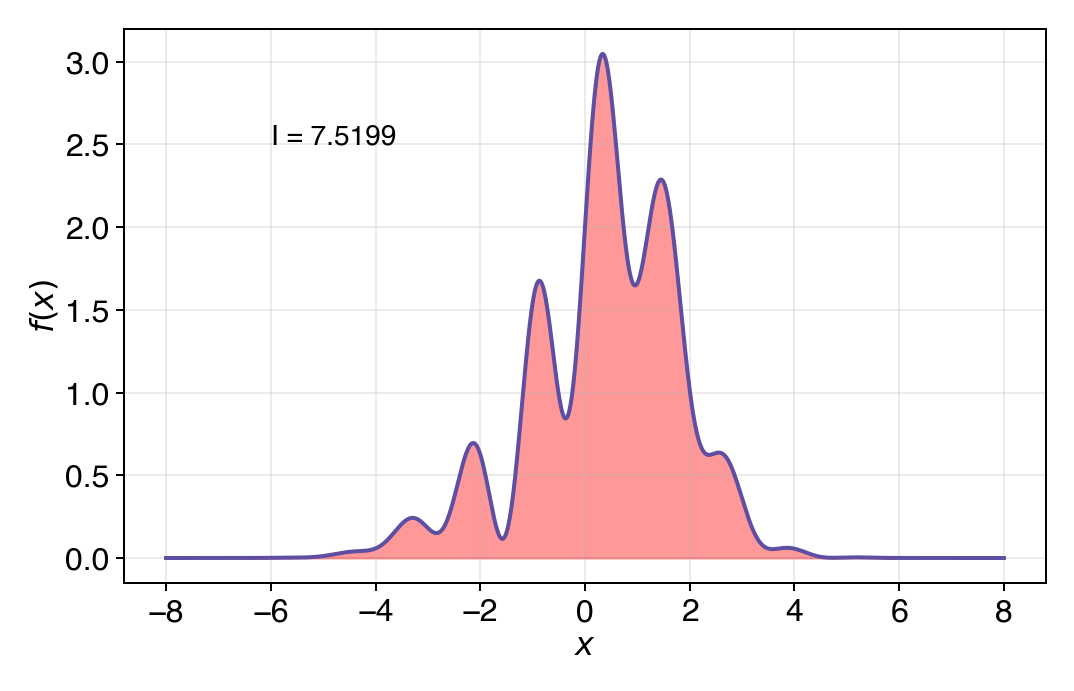

In [3]:
fig, ax = plt.subplots()

a, b = -8, 8
integral = scipy.integrate.quad(f, a, b)[0]

xr = np.linspace(a, b, 1000)
ax.plot(xr, f(xr))
ax.fill_between(xr, f(xr), 0, color='red', alpha=0.4)
ax.grid(alpha=0.3)
ax.set_xlabel("$x$")
ax.set_ylabel("$f(x)$")
ax.text(-6, 2.5, f"I = {integral:.4f}");

# Limitations of uniform sampling

- We can use uniformly distributed points $x_i$ and compute

  \begin{equation*}
  I = \int_a^b f(x) dx = \int_{-\infty}^\infty \pi(x) \frac{f(x)}{\pi(x)} dx
  \simeq \frac{1}{N} \sum_{i=1}^N \frac{f(x_i)}{\pi(x_i)}
  \qquad \pi(x) = \begin{cases}
  1/(b-a) & \text{if} \quad a \le x \le b\\
  0 & \text{otherwise}
  \end{cases}
  \end{equation*}
  
- Is this a good strategy?

In [4]:
# check result
n_points = 2**5
points = np.random.uniform(a, b, n_points)
res = (b-a) * np.sum(f(points)) / n_points
print(f"Estimate = {res}")
print(f"Exact = {scipy.integrate.quad(f, a, b)[0]}")

Estimate = 11.145007694817483
Exact = 7.51988409878008


- The drawback is that many points sample useless areas

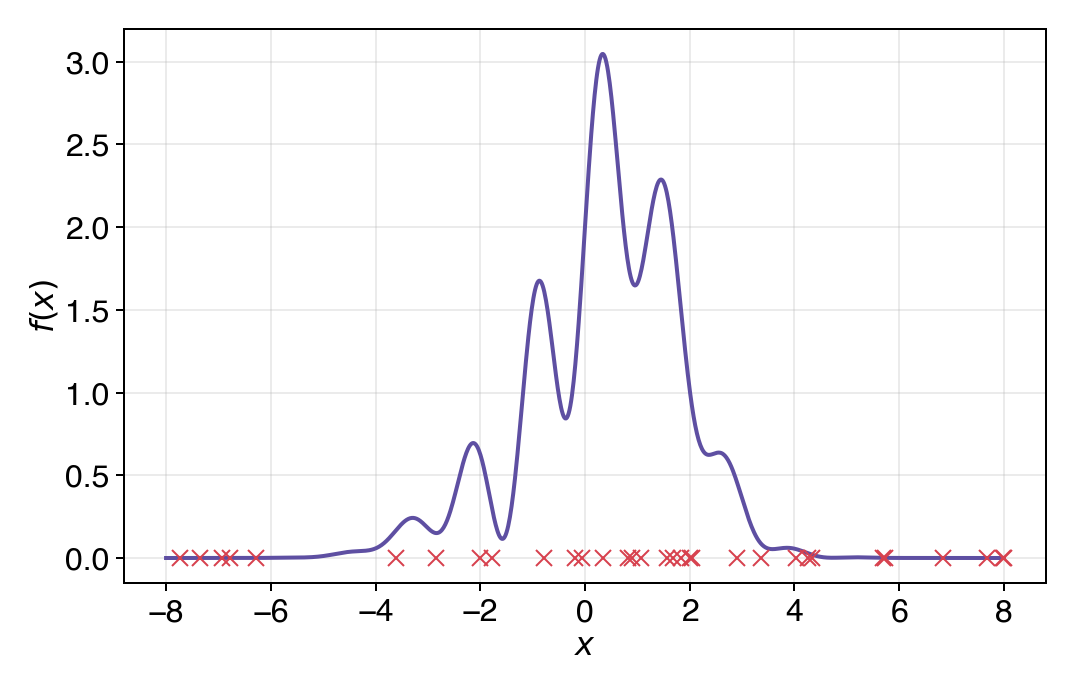

In [5]:
fig, ax = plt.subplots()

xr = np.linspace(a, b, 1000)
ax.plot(xr, f(xr))
ax.plot(points, 0*points, 'x', color="C9")
ax.grid(alpha=0.3)
ax.set_xlabel("$x$")
ax.set_ylabel("$f(x)$");

# Sampling with other distributions

- We are free to use other distributions $\pi$ to sample the points $x_i$

  \begin{equation*}
  I = \int_{-\infty}^\infty f(x) dx = \int_{-\infty}^\infty \pi(x) \frac{f(x)}{\pi(x)} dx
  \simeq \frac{1}{N} \sum_{i=1}^N \frac{f(x_i)}{\pi(x_i)}
  \end{equation*}

- It seems natural to use one that would favour areas where $f(x)$ is large

- Let's try with a normal distribution of width $\sigma$

In [6]:
# check result
n_points = 2**5
σ = 1
gauss = lambda x: np.exp(-0.5 * x**2 / σ**2) / σ / np.sqrt(2*np.pi)
points = np.random.normal(scale=σ, size=n_points)
res = np.sum(f(points) / gauss(points)) / n_points
print(f"Estimate = {res}")

Estimate = 6.079061795433631


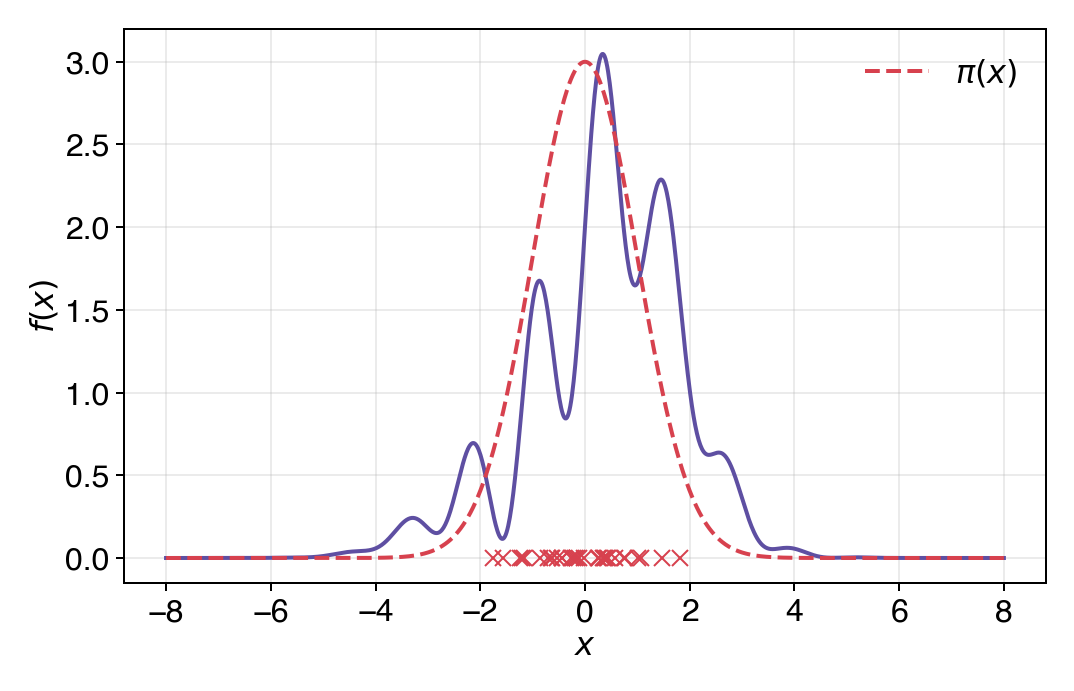

In [7]:
fig, ax = plt.subplots()

xr = np.linspace(a, b, 1000)
ax.plot(xr, f(xr))
ax.plot(points, 0*points, 'x', color="C9")
ax.plot(xr, integral*gauss(xr), '--', color="C9", label=f"$\pi(x)$")
ax.grid(alpha=0.3)
ax.set_xlabel("$x$")
ax.set_ylabel("$f(x)$")
ax.legend();

# Optimal importance sampling

- The width $\sigma$ of the normal distribution is a free parameter

- Let's see how different choices for $\sigma$ change the standard deviation


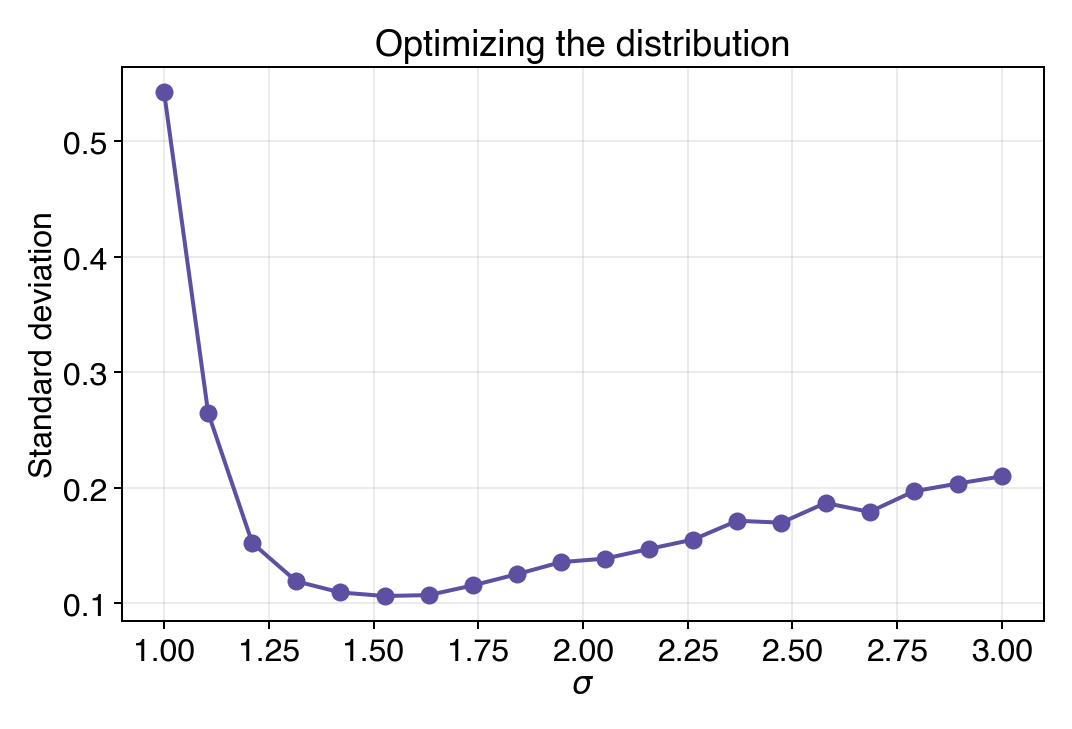

In [8]:
fig, ax = plt.subplots()

n_points = 2**10

def estimate(σ):
    gauss = lambda x: np.exp(-0.5 * x**2 / σ**2) / σ / np.sqrt(2*np.pi)
    points = np.random.normal(scale=σ, size=n_points)
    return np.sum(f(points) / gauss(points)) / n_points

def error(σ):
    return np.std([estimate(σ) for i in range(1000)])

σ_r = np.linspace(1.0, 3.0, 20)
ax.plot(σ_r, np.vectorize(error)(σ_r), '-o')
ax.set_xlabel("$\sigma$")
ax.set_ylabel("Standard deviation")
ax.set_title("Optimizing the distribution")
ax.grid(alpha=0.3)

- For the optimal $\sigma$ the distribution best captures the areas where the function is large

- Ultimately we would want to have a distribution as close to $f(x)$ as possible

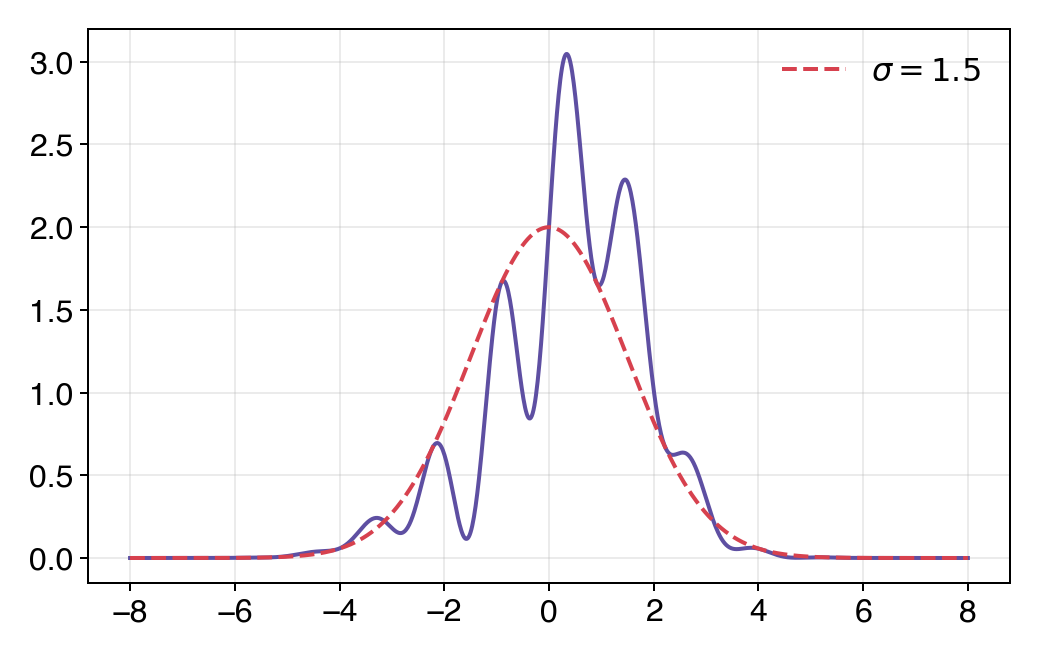

In [9]:
fig, ax = plt.subplots()

σ = 1.5
xr = np.linspace(a, b, 1000)
ax.plot(xr, f(xr))
ax.plot(xr, integral*gauss(xr), '--', color="C9", label=f"$\sigma = {σ}$")
ax.grid(alpha=0.3)
ax.legend();

# Summary

- Importance sampling can be seen as a **variance reduction** technique.

- Better results are obtained when points are sampled according to a distribution that
  is close to the function $f(x)$.

- We need to be able to sample **arbitrary probability distributions**.

# Outline
    
- [Introduction to Monte Carlo](01-intro_monte_carlo.slides.html)

- [Newton–Cotes quadrature](02-newton_cotes.slides.html)
  
- [Importance sampling](03-importance_sampling.slides.html)

- [Direct sampling methods](04-direct_sampling.slides.html)

- [Markov chain sampling and balance condition](05-markov_chain.slides.html)

- [Metropolis-Hastings algorithm](06-metropolis_hastings.slides.html)

- [The two-dimensional Ising model](07-ising.slides.html)

- [Error bar analysis](08-error_analysis.slides.html)
  
- [References](09-references.slides.html)